In [251]:
import praw
from datetime import datetime
import re
import pandas as pd

## Creating Reddit app for PRAW and getting credentials

In [252]:
reddit_read_only = praw.Reddit(client_id = "BgNQD79TR7YuFxbLc2_6KQ",
                               client_secret = "uE3jHR_dku_zK-vr9h5kt4EU4V5zeg",
                               user_agent = "RedScrapper")

## Choosing subreddit and keywords to search by

In [253]:
topic_keywords = 'debate bjp opinion'
subreddit = reddit_read_only.subreddit("india")
num_of_post = 100

## Choosing time periods and fetching comments

### First BJP govt. tenure reddit comments

In [254]:
start_date = (datetime(2014, 1, 1))
end_date = (datetime(2019, 1, 1))

first_term = []

for post in subreddit.search(topic_keywords,limit=num_of_post):
        post.comments.replace_more(limit=0)
        for comment in post.comments.list():
            comment_date = datetime.fromtimestamp(comment.created_utc)
            if start_date <= comment_date <= end_date:
                first_term.append(comment)
                # print(comment.body)


### Second BJP govt. tenure reddit comments

In [255]:
start_date = (datetime(2019, 1, 1))
end_date = (datetime(2024, 1, 1))

second_term = []

for post in subreddit.search(topic_keywords,limit=num_of_post):
        post.comments.replace_more(limit=0) #to handle "MoreComments" object in the subreddit object
        for comment in post.comments.list(): #Iterating through comments
            comment_date = datetime.fromtimestamp(comment.created_utc)
            if start_date <= comment_date <= end_date: #Filtering comments by date
                second_term.append(comment)
                # print(comment.body)

In [256]:
first_term_sorted = sorted(first_term, key = lambda comment: datetime.fromtimestamp(comment.created_utc))
second_term_sorted = sorted(second_term, key = lambda comment: datetime.fromtimestamp(comment.created_utc))

## Creating dataframes after performing sentiment analysis

In [257]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [258]:
def clean_text(text: str):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9 ]',' ',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [259]:
first_term_comments = []
first_term_sentiments = []
first_term_comment_date = []
for comment in first_term_sorted:
    first_term_comments.append(clean_text(comment.body))
    first_term_sentiments.append(analyzer.polarity_scores(comment.body)['compound'])
    first_term_comment_date.append(datetime.fromtimestamp(comment.created_utc))

first_term_data = pd.DataFrame({'Comment':first_term_comments,'Date':first_term_comment_date,'Sentiment':first_term_sentiments},index=first_term_comment_date)
# first_term_data['Category'] = [label for ]

In [260]:
second_term_comments = []
second_term_sentiments = []
second_term_comment_date = []
for comment in second_term_sorted:
    second_term_comments.append(clean_text(comment.body))
    second_term_sentiments.append(analyzer.polarity_scores(comment.body)['compound'])
    second_term_comment_date.append(datetime.fromtimestamp(comment.created_utc))

second_term_data = pd.DataFrame({'Comment':second_term_comments,'Date':second_term_comment_date,'Sentiment':second_term_sentiments},index=second_term_comment_date)

In [261]:
# first_term_data.set_index('Date', inplace=True)
# second_term_data.set_index('Date', inplace=True)

### Resampling data year wise

In [275]:
resampled_first_term_data = first_term_data.resample('3M').mean('Sentiment').dropna()
resampled_second_term_data = second_term_data.resample('3M').mean('Sentiment').dropna()

In [276]:
resampled_first_term_data.dropna()

,Sentiment
2014-01-31,0.339098
2014-04-30,0.082380
2014-07-31,0.091421
2014-10-31,0.194754
2015-01-31,0.255823
2015-04-30,0.111526
2015-07-31,0.062059
2015-10-31,0.496350
2016-01-31,-0.061810
2016-04-30,-0.045445


## Visualizing

In [277]:
import matplotlib.pyplot as plt

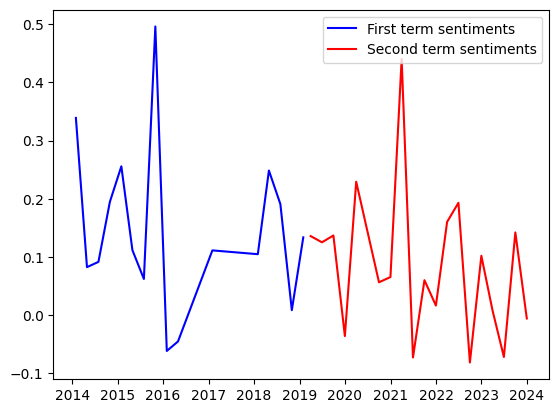

In [278]:
plt.plot(resampled_first_term_data.index, resampled_first_term_data['Sentiment'], color = 'blue', label = 'First term sentiments')
plt.plot(resampled_second_term_data.index, resampled_second_term_data['Sentiment'], color = 'red', label = 'Second term sentiments')
plt.legend()